In [95]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew


In [96]:
with open('data/text_natural/text_natural_1.txt') as f:
    text = f.read()

original_size = len(text) * 8
original_size

22760

In [97]:
char_freq = Counter(text)
char_freq.most_common(5)

[(' ', 479), ('e', 316), ('t', 174), ('r', 171), ('a', 167)]

In [98]:
char_entropy = 0

for freq in char_freq.values():
    prob = freq / len(text)
    char_entropy -= prob * np.log2(prob)

max_char_entropy = np.log2(len(char_freq))

total_char_entropy = len(text) * char_entropy

print(f'Entropy: {char_entropy:.2f} bits per character')
print(f'Max Entropy: {max_char_entropy:.2f} bits per character')
print(f'{char_entropy / max_char_entropy * 100:.0f}% of maximum entropy')
print(f'Total Entropy: {total_char_entropy:.2f} bits')

Entropy: 4.39 bits per character
Max Entropy: 5.61 bits per character
78% of maximum entropy
Total Entropy: 12480.58 bits


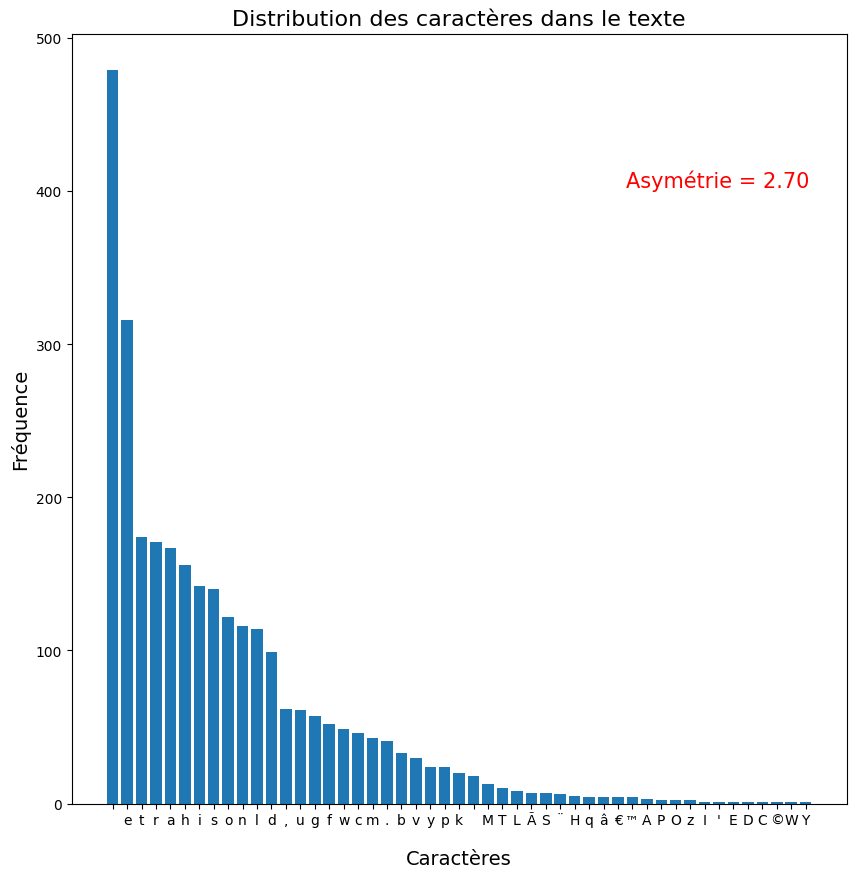

In [99]:
chars, freqs = zip(*char_freq.most_common()) # ChatGPT
char_distribution_skewness = skew(freqs) # ChatGPT

plt.figure(figsize=(10, 10))
plt.bar(chars, freqs)
plt.title("Distribution des caractères dans le texte", fontsize=16)
plt.ylabel("Fréquence", fontsize=14)
plt.xlabel("Caractères", fontsize=14)
plt.text(
    x=0.7*plt.xlim()[1],
    y=0.8*plt.ylim()[1],
    s=f"Asymétrie = {char_distribution_skewness:.2f}",
    fontsize=15,
    color="red"
) # ChatGPT
plt.show()


In [100]:
words = text.split()
word_freq = Counter(words)
word_freq.most_common(5)

[('the', 36), ('of', 22), ('her', 18), ('a', 16), ('and', 14)]

In [101]:
word_entropy = 0

for freq in word_freq.values():
    prob = freq / len(words)
    word_entropy -= prob * np.log2(prob)

max_word_entropy = np.log2(len(word_freq))

total_word_entropy = len(words) * word_entropy

print(f'Entropy: {word_entropy:.2f} bits per word')
print(f'Max Entropy: {max_word_entropy:.2f} bits per word')
print(f'{word_entropy / max_word_entropy * 100:.0f}% of maximum entropy')
print(f'Total Entropy: {total_word_entropy:.2f} bits')

Entropy: 7.41 bits per word
Max Entropy: 8.18 bits per word
91% of maximum entropy
Total Entropy: 3623.26 bits


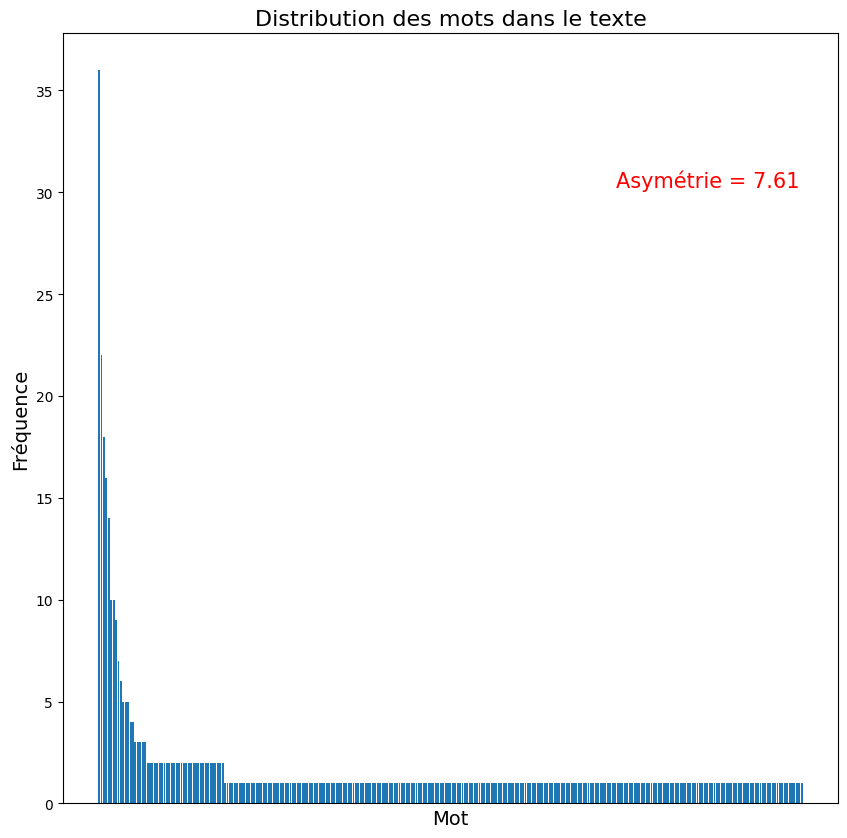

In [102]:
words, freqs = zip(*word_freq.most_common())
word_distribution_skewness = skew(freqs)

plt.figure(figsize=(10, 10))
plt.bar(words, freqs)
plt.title("Distribution des mots dans le texte", fontsize=16)
plt.xticks([])
plt.ylabel("Fréquence", fontsize=14)
plt.xlabel("Mot", fontsize=14)
plt.text(
    x=0.7*plt.xlim()[1],
    y=0.8*plt.ylim()[1],
    s=f"Asymétrie = {word_distribution_skewness:.2f}",
    fontsize=15,
    color="red"
) # ChatGPT
plt.show()

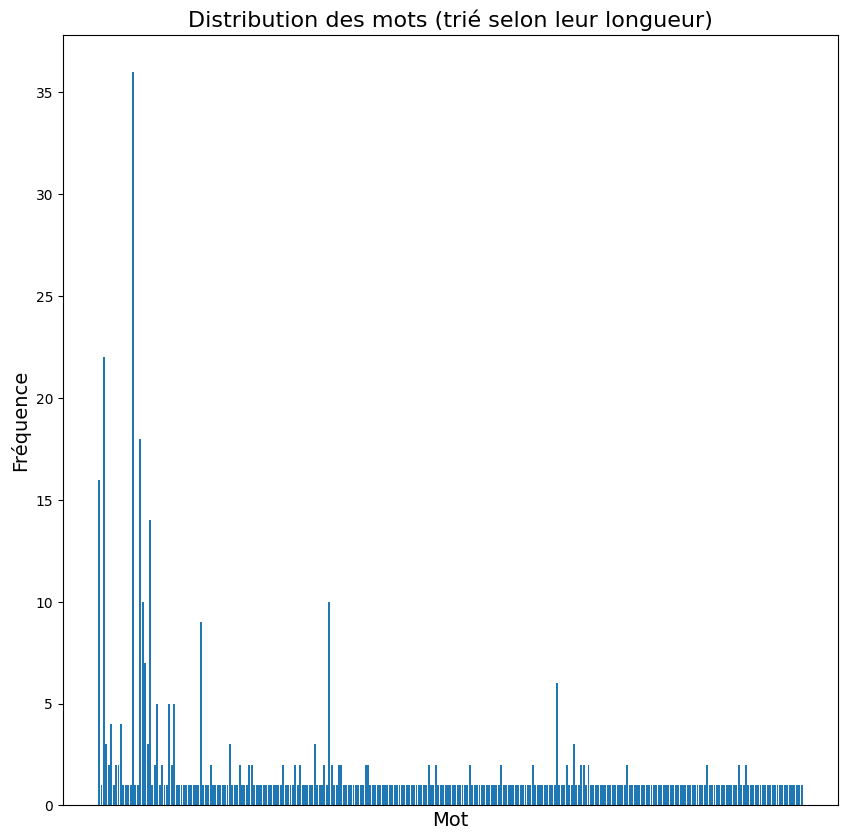

In [103]:
words, freqs = zip(*sorted(word_freq.items(), key=lambda x: len(x[0]))) # ChatGPT

plt.figure(figsize=(10, 10))
plt.bar(words, freqs)
plt.title("Distribution des mots (trié selon leur longueur)", fontsize=16)
plt.xticks([])
plt.ylabel("Fréquence", fontsize=14)
plt.xlabel("Mot", fontsize=14)
plt.show()

In [104]:
from huffman_encoding import huffman_encode, huffman_decode

text_encoded, codes, tree = huffman_encode(text)
text_decoded = huffman_decode(text_encoded, tree)

compressed_size = len(text_encoded) + sum(8 + len(code) for code in codes.values())
compression_ratio = compressed_size / original_size

print(f'Compressed size : {compressed_size} bits')
print(f'Compression ratio : {(compression_ratio * 100):.0f}%')

Compressed size : 13335 bits
Compression ratio : 59%


In [105]:
from lz77_encoding import lz77_encode, lz77_decode

text_encoded = lz77_encode(text)
text_decoded = lz77_decode(text_encoded)

compressed_size = len(text_encoded) * 3 * 8
compression_ratio = compressed_size / original_size

print(f'Compressed size : {compressed_size} bits')
print(f'Compression ratio : {(compression_ratio * 100):.0f}%')

Compressed size : 16248 bits
Compression ratio : 71%


In [106]:
from lzw_encoding import lzw_encode, lzw_decode

text_encoded = lzw_encode(text.encode("utf-8"))
text_decoded = lzw_decode(text_encoded)

compressed_size = sum([code.bit_length() for code in text_encoded])
compression_ratio = compressed_size / original_size

print(f'Compressed size : {compressed_size} bits')
print(f'Compression ratio : {(compression_ratio * 100):.0f}%')

Compressed size : 11406 bits
Compression ratio : 50%
